In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 5)

# Performance Comparison

# Group L0L2

In [74]:
dataset = 'synthetic'
train_size = 1000
sigma = 0.7
max_features = {
    'synthetic': 512,
    'abalone': 250,
    'boston': 130
}

PATH = "/home/gridsan/shibal/MultiTaskSoftTrees/src/SoftTrees"
RUN = 3

In [75]:
sparsities = ['GroupL0L2']
annealing = [True]
learning_rate_scheduling = [True]
# sparsities = ['GroupL0L2']
# annealing = [False]
# learning_rate_scheduling = [False]
criteria = 'auc'
tuning_seeds = [0]
seeds = np.arange(1,26)

for sparsity, anneal, lr_schedule in zip(sparsities, annealing, learning_rate_scheduling):
    print("=============Sparsity:{}, ======== Anneal:{} ====== LR Schedule:{}".format(sparsity, anneal, lr_schedule))
    
    result_df = pd.DataFrame()
    for seed in seeds: 
        for tuning_seed in tuning_seeds:
            path = f"{PATH}/logs/soft_trees/publicdata/{dataset}/{sigma}/{max_features[dataset]}/{sparsity}/mse/{RUN}.{tuning_seed}/anneal{anneal}/learning_rate_scheduling{lr_schedule}/train_size_{train_size}/results/seed{seed}/study-sigmoid.csv"
            try:
                df_temp = pd.read_csv(path)
                df_temp['seed'] = seed
            except:
                print("Missing:", path)
                continue
            result_df = pd.concat([result_df,df_temp],axis=0)
            result_df.index = np.arange(len(result_df))
        
#     df = df[df["user_attrs_approximate_feature_sparsity"]<budget*df["user_attrs_approximate_feature_sparsity"].max()]
#     print("Number of trials satisfying the feature sparsity budget:", df.shape[0])
#     df = df.sort_values(by=["user_attrs_"+criteria+"_valid"], ascending=False)
#     best_value = df["user_attrs_"+criteria+"_valid"].values[0]
#     df_opt = df[df["user_attrs_"+criteria+"_valid"]==best_value]

#     df_opt = df_opt.sort_values(by='user_attrs_feature_sparsity')
#     if criteria=='auc':
#         print("valid_auc:", df_opt.user_attrs_auc_valid.mean())
#         print("test_auc:", df_opt.user_attrs_auc_test.mean())
#         print("test_aucs:", df_opt.user_attrs_auc_test.values)
#     elif criteria=='accuracy':
#         print("valid_accuracy:", df_opt.user_attrs_accuracy_valid.mean())
#         print("test_accuracy:", df_opt.user_attrs_accuracy_test.mean())
#         print("test_accuracies:", df_opt.user_attrs_accuracy_test.values)
#     print("sparsity:", df_opt.user_attrs_feature_sparsity.values)
#     print("Mean sparsity:", df_opt.user_attrs_approximate_feature_sparsity.mean())
# #     print("Approx sparsity:", df_opt.user_attrs_approximate_feature_sparsity.values)
# #     print("Mean approx sparsity:", df_opt.user_attrs_feature_sparsity.mean())
# #     print("Batch-sizes:", df_opt.params_batch_size.values)
#     print("Depths:", df_opt.params_depth.values)
#     print("Epochs:", df_opt.user_attrs_num_epochs.values)
# #     print("Learning Rates:", df_opt.params_learning_rate.values)


=============Sparsity:GroupL0L2, ======== Anneal:True ====== LR Schedule:True


In [76]:
# result_df = result_df[result_df['params_depth']<=4]
# result_df = result_df[result_df['user_attrs_feature_sparsity']<=100]

In [77]:
best_ = dict()
for seed, df in result_df.groupby('seed'):
    if len(df) == 0:
        best_[seed] = pd.Series()
        continue
    best_[seed]=df.iloc[df['user_attrs_mse_valid'].argmin()].copy()
#     best_[gate]['ntrials'] = len(df)
#     best_[gate]['ntrials_all'] = len(df)
#     best_[gate]['test_loss-avg']=df.sort_values(by='val_loss')[:num_top_trials_to_avg].test_loss.mean() 
#     best_[gate]['test_loss-sem']=df.sort_values(by='val_loss')[:num_top_trials_to_avg].test_loss.sem() 
#     best_[gate]['test_sparsity-avg']=df.sort_values(by='val_loss')[:num_top_trials_to_avg].test_sparsity.mean() 
#     best_[gate]['exp-per-sample-avg']=(n - df.sort_values(by='val_loss')[:num_top_trials_to_avg].test_sparsity*n).mean()
#     best_[gate]['exp-per-sample-sem']=(n - df.sort_values(by='val_loss')[:num_top_trials_to_avg].test_sparsity*n).sem()
#     total_trials = len(df)
#     df = df[(df['val_sparsity']>=((1-k/n)-5e-4))]
#     df = df[(df['val_sparsity']>=((1-k/n)-5e-4))&(df['train_sparsity']>=((1-k/n)-5e-4))]
#     if len(df) == 0:
#         best_['SPARSE-'+gate] = pd.Series()
#         continue
#     best_['SPARSE-'+gate]=df.iloc[df['val_loss'].argmin()].copy()
#     best_['SPARSE-'+gate]['ntrials'] = len(df)
#     best_['SPARSE-'+gate]['ntrials_all'] = total_trials
#     best_['SPARSE-'+gate]['test_loss-avg']=df.sort_values(by='val_loss')[:num_top_trials_to_avg].test_loss.mean() 
#     best_['SPARSE-'+gate]['test_loss-sem']=df.sort_values(by='val_loss')[:num_top_trials_to_avg].test_loss.sem() 
#     best_['SPARSE-'+gate]['test_sparsity-avg']=df.sort_values(by='val_loss')[:num_top_trials_to_avg].test_sparsity.mean() 
#     best_['SPARSE-'+gate]['exp-per-sample-avg']=(n - df.sort_values(by='val_loss')[:num_top_trials_to_avg].test_sparsity*n).mean()
#     best_['SPARSE-'+gate]['exp-per-sample-sem']=(n - df.sort_values(by='val_loss')[:num_top_trials_to_avg].test_sparsity*n).sem()
#     best_['SPARSE-'+gate]['test_task1_acc-avg']=df.sort_values(by='val_loss')[:num_top_trials_to_avg].test_task1_acc.mean() 
#     best_['SPARSE-'+gate]['test_task1_acc-sem']=df.sort_values(by='val_loss')[:num_top_trials_to_avg].test_task1_acc.sem() 
#     best_['SPARSE-'+gate]['test_task1_auc-avg']=df.sort_values(by='val_loss')[:num_top_trials_to_avg].test_task1_auc.mean() 
#     best_['SPARSE-'+gate]['test_task1_auc-sem']=df.sort_values(by='val_loss')[:num_top_trials_to_avg].test_task1_auc.sem() 
#     best_['SPARSE-'+gate]['test_task2_mse-avg']=df.sort_values(by='val_loss')[:num_top_trials_to_avg].test_task2_mse.mean() 
#     best_['SPARSE-'+gate]['test_task2_mse-sem']=df.sort_values(by='val_loss')[:num_top_trials_to_avg].test_task2_mse.sem() 
        

In [78]:
best_df = pd.DataFrame(best_).T

In [79]:
metrics = [
    'params_batch_size_scaler', 'params_constant_batch_size',
    'params_constant_learning_rate', 'params_depth', 'params_epochs', 
#     'params_kernel_constraint',
    'params_kernel_l2',
    'params_learning_rate_scheduling', 'params_num_trees',
    'params_temperature',
    'params_use_annealing',
    'user_attrs_feature_sparsity',
    'user_attrs_feature_support',
    'user_attrs_feature_support_truth',
    'user_attrs_fnr', 'user_attrs_fpr',
    'user_attrs_mse_test',
    'user_attrs_mse_valid', 
    'user_attrs_num_epochs', 'user_attrs_tnr',
    'user_attrs_tpr',    
    'user_attrs_f1',    
]
best_df = best_df[metrics]

In [80]:
best_df

,params_batch_size_scaler,params_constant_batch_size,params_constant_learning_rate,params_depth,params_epochs,params_kernel_l2,params_learning_rate_scheduling,params_num_trees,params_temperature,params_use_annealing,...,user_attrs_feature_support,user_attrs_feature_support_truth,user_attrs_fnr,user_attrs_fpr,user_attrs_mse_test,user_attrs_mse_valid,user_attrs_num_epochs,user_attrs_tnr,user_attrs_tpr,user_attrs_f1
1,11,16,0.015032,1,480,0.108619,True,9,0.072758,True,...,[False False False False False False False Fal...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.0,0.0,0.260599,0.272429,480,1.0,1.0,1.0
2,2,16,0.025633,1,455,0.134015,True,6,0.007012,True,...,[False False False False False False False Fal...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.0,0.0,0.257461,0.258573,455,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,2,16,0.03088,2,465,0.003652,True,1,0.00372,True,...,[False False False False False False False Fal...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.0,0.0,0.259641,0.258361,465,1.0,1.0,1.0
25,2,16,0.025633,1,455,0.134015,True,6,0.007012,True,...,[False False False False False False False Fal...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.0,0.0,0.260466,0.258385,455,1.0,1.0,1.0


In [81]:
best_df.columns

Index(['params_batch_size_scaler', 'params_constant_batch_size',
       'params_constant_learning_rate', 'params_depth', 'params_epochs',
       'params_kernel_l2', 'params_learning_rate_scheduling',
       'params_num_trees', 'params_temperature', 'params_use_annealing',
       'user_attrs_feature_sparsity', 'user_attrs_feature_support',
       'user_attrs_feature_support_truth', 'user_attrs_fnr', 'user_attrs_fpr',
       'user_attrs_mse_test', 'user_attrs_mse_valid', 'user_attrs_num_epochs',
       'user_attrs_tnr', 'user_attrs_tpr', 'user_attrs_f1'],
      dtype='object')

In [82]:
best_df.index

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25],
      dtype='int64')

In [83]:
sparse_df = result_df[result_df['user_attrs_feature_sparsity']<=100]

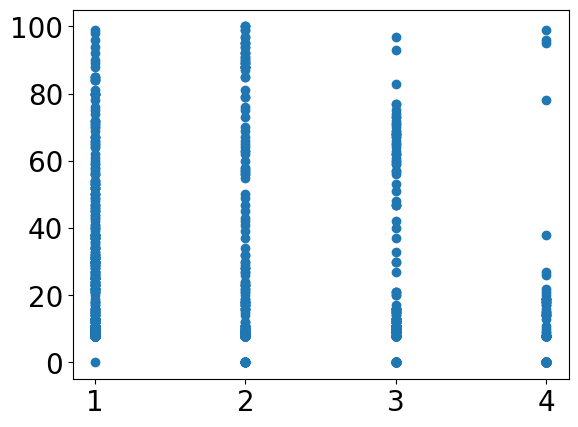

In [84]:
plt.scatter(sparse_df['params_depth'], sparse_df['user_attrs_feature_sparsity'])

In [85]:
sparse_df['user_attrs_num_epochs'].sort_values().values[-1000:]

array([ 55,  55,  55,  55,  55,  55,  55,  55,  55,  55,  55,  55,  55,
        55,  55,  55,  55,  55,  55,  55,  55,  55,  55,  55,  65,  65,
        65,  65,  65,  65,  65,  65,  65,  65,  65,  65,  65,  65,  65,
        65,  65,  65,  65,  65,  65,  65,  65,  65,  65,  75,  75,  75,
        75,  75,  75,  75,  75,  75,  75,  75,  75,  75,  75,  75,  75,
        75,  75,  75,  75,  75,  75,  75,  75,  75,  80,  80,  80,  80,
        80,  80,  80,  80,  80,  80,  80,  80,  80,  80,  80,  80,  80,
        80,  80,  80,  80,  80,  80,  80,  80,  95,  95,  95,  95,  95,
        95,  95,  95,  95,  95,  95,  95,  95,  95,  95,  95,  95,  95,
        95,  95,  95,  95,  95,  95,  95, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 120, 120, 120, 120, 120, 120, 120,
       120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120,
       120, 120, 120, 120, 120, 135, 135, 135, 135, 135, 135, 13

In [86]:
best_df['params_depth'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1], dtype=object)

In [87]:
best_df['user_attrs_mse_test'].mean(), best_df['user_attrs_mse_test'].sem()

(0.26048290382385336, 0.0009252069835763745)

In [88]:
best_df['user_attrs_f1'].mean(), best_df['user_attrs_f1'].sem()

(0.9952941176470589, 0.0032574995540855267)

In [89]:
best_df['user_attrs_feature_sparsity'].mean(), best_df['user_attrs_feature_sparsity'].sem()

(8.08, 0.05537749241945382)

In [90]:
best_df['user_attrs_mse_test'].sort_values().values

array([0.2496339410017648, 0.256013720809671, 0.2568116796618254,
       0.2569021599910112, 0.2570230349866277, 0.2574515756553278,
       0.2574607588199176, 0.2581493516573647, 0.2587719749712704,
       0.2587743384580189, 0.2596408138495804, 0.2601543040092355,
       0.2604662990387948, 0.2605985407966693, 0.2606488566991503,
       0.2607158320215376, 0.2608330338104857, 0.2611384786435554,
       0.2620205314282517, 0.2621090821333299, 0.2639874343003962,
       0.2649581959436687, 0.2649616782822744, 0.2692086806965425,
       0.2736382979300619], dtype=object)

In [91]:
best_df['user_attrs_feature_sparsity'].mean()

8.08

In [92]:
best_df['user_attrs_feature_sparsity'].values

array([8, 8, 8, 8, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8], dtype=object)

In [93]:
best_df['user_attrs_num_epochs'].values

array([480, 455, 485, 485, 435, 455, 435, 455, 485, 485, 455, 485, 485,
       485, 485, 435, 485, 485, 455, 435, 485, 485, 435, 465, 455],
      dtype=object)

In [94]:
best_df.columns

Index(['params_batch_size_scaler', 'params_constant_batch_size',
       'params_constant_learning_rate', 'params_depth', 'params_epochs',
       'params_kernel_l2', 'params_learning_rate_scheduling',
       'params_num_trees', 'params_temperature', 'params_use_annealing',
       'user_attrs_feature_sparsity', 'user_attrs_feature_support',
       'user_attrs_feature_support_truth', 'user_attrs_fnr', 'user_attrs_fpr',
       'user_attrs_mse_test', 'user_attrs_mse_valid', 'user_attrs_num_epochs',
       'user_attrs_tnr', 'user_attrs_tpr', 'user_attrs_f1'],
      dtype='object')

In [95]:
best_df['user_attrs_feature_sparsity'].values

array([8, 8, 8, 8, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8], dtype=object)

In [96]:
best_df['user_attrs_feature_sparsity'].mean(), best_df['user_attrs_feature_sparsity'].sem()

(8.08, 0.05537749241945382)

In [97]:
best_df['params_constant_learning_rate'].mean()

0.031451639376289545

In [98]:
best_df['user_attrs_feature_support_truth']

1     [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
2     [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
                            ...                        
24    [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
25    [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
Name: user_attrs_feature_support_truth, Length: 25, dtype: object

In [99]:
best_df['user_attrs_feature_support_truth'].str.rsplit(pat='[', n=max_features[dataset], expand=True)

,0,1
1,,0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...
2,,0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...
...,...,...
24,,0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...
25,,0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...


In [100]:
best_df['user_attrs_feature_support_truth']

1     [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
2     [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
                            ...                        
24    [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
25    [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
Name: user_attrs_feature_support_truth, Length: 25, dtype: object

In [101]:
best_df['user_attrs_feature_support_truth'].str.rsplit(pat='[', n=max_features[dataset], expand=True)[1].str.rsplit(pat=']', n=256, expand=True)[0]

1     0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...
2     0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...
                            ...                        
24    0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...
25    0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...
Name: 0, Length: 25, dtype: object

In [102]:
feature_support_truth = best_df['user_attrs_feature_support_truth'].str.rsplit(pat='[', n=max_features[dataset], expand=True)[1].str.rsplit(pat=']', n=max_features[dataset], expand=True)[0].str.rsplit(pat='.', n=max_features[dataset], expand=True).iloc[:,:-1]
feature_support_truth = feature_support_truth.astype(int)
feature_support_truth.mean().values.astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [103]:
feature_support_truth

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
feature_support_recovery = best_df['user_attrs_feature_support'].str.rsplit(pat='[', n=max_features[dataset], expand=True)[1].str.rsplit(pat=']', n=max_features[dataset], expand=True)[0].str.replace('\n','').str.strip()
feature_support_recovery = feature_support_recovery.str.replace("  ",",")
feature_support_recovery = feature_support_recovery.str.replace(" ",",")
feature_support_recovery = feature_support_recovery.str.rsplit(pat=',', n=max_features[dataset], expand=True)
str2bool = {'True': 1, 'False': 0}
for col in feature_support_recovery.columns:
    feature_support_recovery[col] = feature_support_recovery[col].map(str2bool)


In [105]:
(feature_support_recovery.mean().values>0.5).astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [106]:
feature_support_truth.mean().values.astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [107]:
feature_support_recovery.mean().values[feature_support_truth.mean().values.astype(bool)]

array([1., 1., 1., 1., 1., 1., 1., 1.])

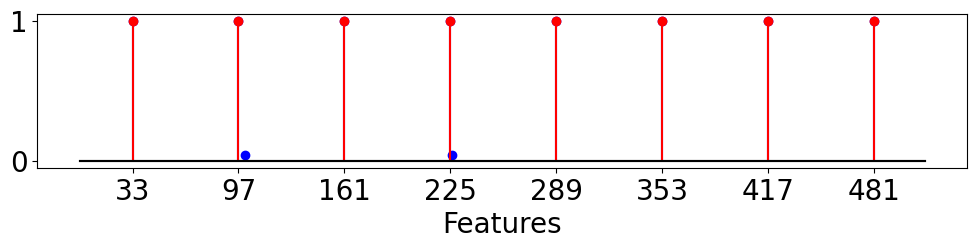

In [108]:
feature_support_recovery_median = feature_support_recovery.mean().values
feature_support_recovery_median[feature_support_recovery_median==0] = np.nan

feature_support_truth_median = feature_support_truth.mean().values
feature_support_truth_median[feature_support_truth_median==0] = np.nan

plt.figure(figsize=(12,2))
plt.stem(np.arange(1, max_features[dataset]+1), feature_support_recovery_median, markerfmt='b', linefmt='b', basefmt='k')


feature_support_truth_median = feature_support_truth.mean().values
feature_support_recovery_median = feature_support_recovery.mean().values
feature_support_recovery_median[feature_support_truth_median==0] = np.nan
font = {'size': 20}

plt.rc('font', **font)
plt.stem(np.arange(1, max_features[dataset]+1), feature_support_recovery_median, markerfmt='r', linefmt='r', basefmt='k')
plt.xticks(np.where(feature_support_truth.mean().values.astype(bool))[0]+1)
plt.yticks([0,1])
plt.xlabel("Features")
plt.savefig(f"./Figures/features_selected_sigma{sigma}_p_{max_features[dataset]}_train_size{train_size}.pdf", bbox_inches='tight')
plt.show()


In [ ]:
np.where(feature_support_truth.mean().values.astype(bool))[0]

In [ ]:
feature_support_truth.mean().values.astype(int)

In [ ]:
feature_support_recovery.mean().values[~(feature_support_truth.mean().values.astype(bool))].mean()

# XGBoost

In [227]:
dataset = "synthetic"
train_size = 1000
sigma = 0.7
max_features = {
    'synthetic': 512,
    'abalone': 250,
    'boston': 130
}

PATH = "/home/gridsan/shibal/MultiTaskSoftTrees/src/baselines"
RUN = 3

In [228]:
criteria = 'mse'
tuning_seeds = [0]
seeds = np.arange(1,26)
method = 'xgboost'

result_df = pd.DataFrame()
for seed in seeds: 
    for tuning_seed in tuning_seeds:
        path = f"{PATH}/logs/feature-selection/{method}/publicdata/{dataset}/{sigma}/{max_features[dataset]}/mse/{RUN}.0/train_size_{train_size}/results/seed{seed}/study.csv"
        try:
            df_temp = pd.read_csv(path)
            df_temp['seed'] = seed
        except:
            print("Missing:", path)
            continue
        result_df = pd.concat([result_df,df_temp],axis=0)
        result_df.index = np.arange(len(result_df))
        
#     df = df[df["user_attrs_approximate_feature_sparsity"]<budget*df["user_attrs_approximate_feature_sparsity"].max()]
#     print("Number of trials satisfying the feature sparsity budget:", df.shape[0])
#     df = df.sort_values(by=["user_attrs_"+criteria+"_valid"], ascending=False)
#     best_value = df["user_attrs_"+criteria+"_valid"].values[0]
#     df_opt = df[df["user_attrs_"+criteria+"_valid"]==best_value]

#     df_opt = df_opt.sort_values(by='user_attrs_feature_sparsity')
#     if criteria=='auc':
#         print("valid_auc:", df_opt.user_attrs_auc_valid.mean())
#         print("test_auc:", df_opt.user_attrs_auc_test.mean())
#         print("test_aucs:", df_opt.user_attrs_auc_test.values)
#     elif criteria=='accuracy':
#         print("valid_accuracy:", df_opt.user_attrs_accuracy_valid.mean())
#         print("test_accuracy:", df_opt.user_attrs_accuracy_test.mean())
#         print("test_accuracies:", df_opt.user_attrs_accuracy_test.values)
#     print("sparsity:", df_opt.user_attrs_feature_sparsity.values)
#     print("Mean sparsity:", df_opt.user_attrs_approximate_feature_sparsity.mean())
# #     print("Approx sparsity:", df_opt.user_attrs_approximate_feature_sparsity.values)
# #     print("Mean approx sparsity:", df_opt.user_attrs_feature_sparsity.mean())
# #     print("Batch-sizes:", df_opt.params_batch_size.values)
#     print("Depths:", df_opt.params_depth.values)
#     print("Epochs:", df_opt.user_attrs_num_epochs.values)
# #     print("Learning Rates:", df_opt.params_learning_rate.values)


In [229]:
best_ = dict()
for seed, df in result_df.groupby('seed'):
    if len(df) == 0:
        best_[seed] = pd.Series()
        continue
    best_[seed]=df.iloc[df['user_attrs_mse_valid'].argmin()].copy()
#     best_[gate]['ntrials'] = len(df)
#     best_[gate]['ntrials_all'] = len(df)
#     best_[gate]['test_loss-avg']=df.sort_values(by='val_loss')[:num_top_trials_to_avg].test_loss.mean() 
#     best_[gate]['test_loss-sem']=df.sort_values(by='val_loss')[:num_top_trials_to_avg].test_loss.sem() 
#     best_[gate]['test_sparsity-avg']=df.sort_values(by='val_loss')[:num_top_trials_to_avg].test_sparsity.mean() 
#     best_[gate]['exp-per-sample-avg']=(n - df.sort_values(by='val_loss')[:num_top_trials_to_avg].test_sparsity*n).mean()
#     best_[gate]['exp-per-sample-sem']=(n - df.sort_values(by='val_loss')[:num_top_trials_to_avg].test_sparsity*n).sem()
#     total_trials = len(df)
#     df = df[(df['val_sparsity']>=((1-k/n)-5e-4))]
#     df = df[(df['val_sparsity']>=((1-k/n)-5e-4))&(df['train_sparsity']>=((1-k/n)-5e-4))]
#     if len(df) == 0:
#         best_['SPARSE-'+gate] = pd.Series()
#         continue
#     best_['SPARSE-'+gate]=df.iloc[df['val_loss'].argmin()].copy()
#     best_['SPARSE-'+gate]['ntrials'] = len(df)
#     best_['SPARSE-'+gate]['ntrials_all'] = total_trials
#     best_['SPARSE-'+gate]['test_loss-avg']=df.sort_values(by='val_loss')[:num_top_trials_to_avg].test_loss.mean() 
#     best_['SPARSE-'+gate]['test_loss-sem']=df.sort_values(by='val_loss')[:num_top_trials_to_avg].test_loss.sem() 
#     best_['SPARSE-'+gate]['test_sparsity-avg']=df.sort_values(by='val_loss')[:num_top_trials_to_avg].test_sparsity.mean() 
#     best_['SPARSE-'+gate]['exp-per-sample-avg']=(n - df.sort_values(by='val_loss')[:num_top_trials_to_avg].test_sparsity*n).mean()
#     best_['SPARSE-'+gate]['exp-per-sample-sem']=(n - df.sort_values(by='val_loss')[:num_top_trials_to_avg].test_sparsity*n).sem()
#     best_['SPARSE-'+gate]['test_task1_acc-avg']=df.sort_values(by='val_loss')[:num_top_trials_to_avg].test_task1_acc.mean() 
#     best_['SPARSE-'+gate]['test_task1_acc-sem']=df.sort_values(by='val_loss')[:num_top_trials_to_avg].test_task1_acc.sem() 
#     best_['SPARSE-'+gate]['test_task1_auc-avg']=df.sort_values(by='val_loss')[:num_top_trials_to_avg].test_task1_auc.mean() 
#     best_['SPARSE-'+gate]['test_task1_auc-sem']=df.sort_values(by='val_loss')[:num_top_trials_to_avg].test_task1_auc.sem() 
#     best_['SPARSE-'+gate]['test_task2_mse-avg']=df.sort_values(by='val_loss')[:num_top_trials_to_avg].test_task2_mse.mean() 
#     best_['SPARSE-'+gate]['test_task2_mse-sem']=df.sort_values(by='val_loss')[:num_top_trials_to_avg].test_task2_mse.sem() 
        

In [230]:
best_df = pd.DataFrame(best_).T

In [231]:
best_df.columns

Index(['Unnamed: 0', 'number', 'value', 'datetime_start', 'datetime_complete',
       'duration', 'params_feature_importance_threshold',
       'params_learning_rate', 'user_attrs_f1', 'user_attrs_feature_sparsity',
       'user_attrs_feature_support', 'user_attrs_feature_support_truth',
       'user_attrs_fnr', 'user_attrs_fpr', 'user_attrs_mse_test',
       'user_attrs_mse_valid', 'user_attrs_tnr', 'user_attrs_tpr', 'state',
       'seed'],
      dtype='object')

In [232]:
# metrics = [
#    'user_attrs_mse_test',
#    'user_attrs_mse_valid',
#     'params_feature_importance_threshold',
# #     'params_learning_rate',
#     'params_max_depth',
#     'params_n_estimators',
#    'user_attrs_f1',
#    'user_attrs_feature_sparsity',
#    'user_attrs_feature_support',
#    'user_attrs_feature_support_truth',
#    'user_attrs_fnr',
#    'user_attrs_fpr',
#    'user_attrs_tnr',
#    'user_attrs_tpr',    
# ]
# best_df = best_df[metrics]

In [233]:
best_df

,Unnamed: 0,number,value,datetime_start,datetime_complete,duration,params_feature_importance_threshold,params_learning_rate,user_attrs_f1,user_attrs_feature_sparsity,user_attrs_feature_support,user_attrs_feature_support_truth,user_attrs_fnr,user_attrs_fpr,user_attrs_mse_test,user_attrs_mse_valid,user_attrs_tnr,user_attrs_tpr,state,seed
1,313,313,1.879906,2023-10-04 12:24:39.568307,2023-10-04 12:24:47.594758,0 days 00:00:08.026451,0.007722,0.114353,0.4,32,[False False False False False False False Fal...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.0,0.047619,1.774025,1.879906,0.952381,1.0,COMPLETE,1
2,163,163,1.580483,2023-10-04 12:00:15.166360,2023-10-04 12:00:23.495477,0 days 00:00:08.329117,0.007402,0.054091,0.666667,16,[False False False False False False False Fal...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.0,0.015873,1.772931,1.580483,0.984127,1.0,COMPLETE,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,313,313,1.721404,2023-10-04 12:22:01.858772,2023-10-04 12:22:09.815930,0 days 00:00:07.957158,0.007722,0.114353,0.457143,27,[False False False False False False False Fal...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.0,0.037698,1.702822,1.721404,0.962302,1.0,COMPLETE,24
25,313,313,1.672022,2023-10-04 12:20:19.517249,2023-10-04 12:20:27.580609,0 days 00:00:08.063360,0.007722,0.114353,0.390244,33,[False False False False False False False Fal...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.0,0.049603,1.799294,1.672022,0.950397,1.0,COMPLETE,25


In [234]:
best_df.columns

Index(['Unnamed: 0', 'number', 'value', 'datetime_start', 'datetime_complete',
       'duration', 'params_feature_importance_threshold',
       'params_learning_rate', 'user_attrs_f1', 'user_attrs_feature_sparsity',
       'user_attrs_feature_support', 'user_attrs_feature_support_truth',
       'user_attrs_fnr', 'user_attrs_fpr', 'user_attrs_mse_test',
       'user_attrs_mse_valid', 'user_attrs_tnr', 'user_attrs_tpr', 'state',
       'seed'],
      dtype='object')

In [235]:
best_df['user_attrs_mse_test'].mean(), best_df['user_attrs_mse_test'].sem()

(1.8055509667258542, 0.01886161043839673)

In [236]:
best_df['user_attrs_f1'].mean(), best_df['user_attrs_f1'].sem()

(0.5137575420111713, 0.01727660860428159)

In [237]:
best_df['user_attrs_feature_sparsity'].mean(), best_df['user_attrs_feature_sparsity'].sem()

(23.96, 1.023848947192244)

In [238]:
best_df['user_attrs_feature_sparsity'].values

array([32, 16, 23, 20, 16, 23, 16, 24, 28, 25, 22, 23, 17, 28, 18, 28, 27,
       20, 26, 20, 30, 27, 30, 27, 33], dtype=object)

In [239]:
best_df['user_attrs_tpr'].mean(), best_df['user_attrs_fpr'].mean()

(1.0, 0.031666666666666635)

In [240]:
feature_support_truth = best_df['user_attrs_feature_support_truth'].str.rsplit(pat='[', n=max_features[dataset], expand=True)[1]
feature_support_truth = feature_support_truth.str.rsplit(pat=']', n=max_features[dataset], expand=True)[0].str.replace('\n',' ').str.strip()
feature_support_truth = feature_support_truth.str.rsplit(pat='.', n=max_features[dataset], expand=True).iloc[:,:-1]
feature_support_truth = feature_support_truth.astype(int)
feature_support_truth.mean().values.astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [241]:
feature_support_truth

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [242]:
best_df['user_attrs_feature_support']

1     [False False False False False False False Fal...
2     [False False False False False False False Fal...
                            ...                        
24    [False False False False False False False Fal...
25    [False False False False False False False Fal...
Name: user_attrs_feature_support, Length: 25, dtype: object

In [243]:
feature_support_recovery = best_df['user_attrs_feature_support'].str.replace('\n','').str.strip()
feature_support_recovery = feature_support_recovery.str.rsplit(pat='[', n=max_features[dataset], expand=True)[1].str.rsplit(pat=']', n=
                                                                                                                            max_features[dataset], expand=True)[0].str.strip()
feature_support_recovery = feature_support_recovery.str.replace("  ",",")
feature_support_recovery = feature_support_recovery.str.replace(" ",",")
feature_support_recovery = feature_support_recovery.str.rsplit(pat=',', n=max_features[dataset], expand=True)
feature_support_recovery

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
25,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [244]:
feature_support_recovery[0]

1     False
2     False
      ...  
24    False
25    False
Name: 0, Length: 25, dtype: object

In [245]:
feature_support_truth

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [246]:
feature_support_recovery = best_df['user_attrs_feature_support'].str.replace('\n','').str.strip()
feature_support_recovery = feature_support_recovery.str.rsplit(pat='[', n=max_features[dataset], expand=True)[1].str.rsplit(pat=']', n=max_features[dataset], expand=True)[0].str.replace('\n','').str.strip()
feature_support_recovery = feature_support_recovery.str.replace("  ",",")
feature_support_recovery = feature_support_recovery.str.replace(" ",",")
feature_support_recovery = feature_support_recovery.str.rsplit(pat=',', n=max_features[dataset], expand=True)
str2bool = {'True': 1.0, 'False': 0.0}
for col in feature_support_recovery.columns:
    feature_support_recovery[col] = feature_support_recovery[col].map(str2bool)


In [247]:
(feature_support_recovery.mean().values>0.5).astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

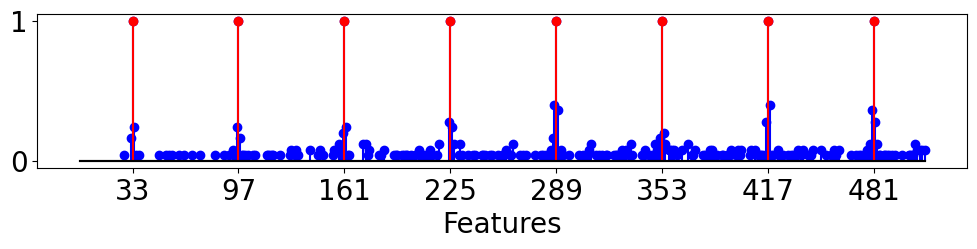

In [248]:
feature_support_recovery_median = feature_support_recovery.mean().values
feature_support_recovery_median[feature_support_recovery_median==0] = np.nan


plt.figure(figsize=(12,2))
plt.stem(np.arange(1, max_features[dataset]+1), feature_support_recovery_median, markerfmt='b', linefmt='b', basefmt='k')

feature_support_truth_median = feature_support_truth.mean().values
feature_support_recovery_median = feature_support_recovery.mean().values
feature_support_recovery_median[feature_support_truth_median==0] = np.nan
plt.stem(np.arange(1, max_features[dataset]+1), feature_support_recovery_median, markerfmt='r', linefmt='r', basefmt='k')
plt.xticks(np.where(feature_support_truth.mean().values.astype(bool))[0]+1)
plt.yticks([0,1])
plt.xlabel("Features")
plt.savefig(f"./Figures/features_selected_{method}_sigma_{sigma}_p_{max_features[dataset]}_train_size{train_size}.pdf", bbox_inches='tight')
plt.show()


In [204]:
feature_support_recovery

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
feature_support_recovery.mean().values

array([0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.08, 0.04, 0.08, 0.12, 0.08, 0.04, 0.08, 0.08,
       0.04, 0.04, 0.08, 0.12, 0.08, 0.08, 0.08, 0.04, 0.08, 0.28, 0.48,
       0.24, 0.08, 0.16, 0.16, 0.08, 0.04, 0.16, 0.12, 0.04, 0.04, 0.08,
       0.08, 0.16, 0.16, 0.16, 0.12, 0.12, 0.2 , 0.16, 0.16, 0.08, 0.16,
       0.08, 0.04, 0.12, 0.12, 0.16, 0.08, 0.16, 0.16, 0.12, 0.08, 0.16,
       0.12, 0.12, 0.08, 0.08, 0.08, 0.08, 0.08, 0.16, 0.08, 0.12, 0.2 ,
       0.12, 0.2 , 0.16, 0.16, 0.12, 0.12, 0.16, 0.16, 0.16, 0.08, 0.04,
       0.12, 0.2 , 0.04, 0.04, 0.08, 0.16, 0.32, 0.2 , 0.64, 0.24, 0.28,
       0.2 , 0.2 , 0.12, 0.16, 0.12, 0.12, 0.04, 0.08, 0.2 , 0.12, 0.04,
       0.12, 0.16, 0.16, 0.24, 0.08, 0.16, 0.2 , 0.08, 0.08, 0.16, 0.08,
       0.24, 0.2 , 0.16, 0.16, 0.2 , 0.2 , 0.24, 0.12, 0.2 , 0.16, 0.16,
       0.04, 0.16, 0.16, 0.12, 0.12, 0.16, 0.08, 0.2 , 0.08, 0.08, 0.2 ,
       0.24, 0.2 , 0.12, 0.16, 0.24, 0.12, 0.2 , 0.

In [133]:
feature_support_truth.mean().values.astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [134]:
(feature_support_recovery.mean().values>0.5).astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [135]:
feature_support_recovery.mean().values[feature_support_truth.mean().values.astype(bool)]

array([0.48, 0.64, 0.64, 0.72, 0.72, 0.88, 0.72, 0.76])

In [136]:
feature_support_recovery.mean().values[~(feature_support_truth.mean().values.astype(bool))].mean()

0.14595238095238094

In [137]:
    print("Number of total trials:", df.shape[0])
    print("Max number of features:", max_features[data])
    df = df[(df["user_attrs_feature_sparsity"]<=budget*max_features[data])&(df["user_attrs_feature_sparsity"]>0)]
    print("Number of trials satisfying the feature sparsity budget:", df.shape[0])
    df = df.sort_values(by=["user_attrs_"+criteria+"_valid"], ascending=False)
    best_value = df["user_attrs_"+criteria+"_valid"].values[0]
    df_opt = df[df["user_attrs_"+criteria+"_valid"]==best_value]

    df_opt = df_opt.sort_values(by='user_attrs_feature_sparsity')
    if criteria=='auc':
        print("valid_auc:", df_opt.user_attrs_auc_valid.mean())
        print("test_auc:", df_opt.user_attrs_auc_test.mean())
        print("test_aucs:", df_opt.user_attrs_auc_test.values)
    elif criteria=='accuracy':
        print("valid_accuracy:", df_opt.user_attrs_accuracy_valid.mean())
        print("test_accuracy:", df_opt.user_attrs_accuracy_test.mean())
        print("test_accuracies:", df_opt.user_attrs_accuracy_test.values)
    print("sparsity:", df_opt.user_attrs_feature_sparsity.values)
    print("Mean sparsity:", df_opt.user_attrs_approximate_feature_sparsity.mean())
#     print("Approx sparsity:", df_opt.user_attrs_approximate_feature_sparsity.values)
#     print("Mean approx sparsity:", df_opt.user_attrs_feature_sparsity.mean())
    print("Batch-sizes:", df_opt.params_constant_batch_size.values*df_opt.params_batch_size_scaler.values)
    print("Epochs:", df_opt.user_attrs_num_epochs.values)
    print("Depth:", df_opt.params_depth.values)
    print("Number of Trees:", df_opt.params_num_trees.values)
    if "params_kernel_constraint" in df_opt.columns:
        print("L1/L0:", df_opt.params_kernel_constraint.values)
    if "params_kernel_l2" in df_opt.columns:
        print("L2:", df_opt.params_kernel_l2.values)
    if "params_temperature" in df_opt.columns:
        print("T:", df_opt.params_temperature.values)


Number of total trials: 500


NameError: name 'data' is not defined

In [ ]:
df_opt

In [ ]:
df.shape

In [ ]:
pd.to_timedelta(df['duration']).mean()

In [ ]:
df.duration.mean()

In [ ]:
data = 'dorothea'
max_features = {
    'hypothyroid': 44,
    'spambase': 57,
    'churn': 33,
    'twonorm': 20,
    'optdigits': 108,
    'satimage': 36,
    'texture': 40,
    'mice-protein': 77,
    'isolet': 617,
    'human-activity-recognition': 561,
    'mnist': 784,
    'fashion-mnist': 784,
    'sleep': 231,
    'gisette': 5000,
    'madelon': 500,
    'dorothea': 100000
}

In [ ]:
sparsities = ['none']
annealing = [False]
learning_rate_scheduling = [False]
# sparsities = ['GroupL0L2']
# annealing = [False]
# learning_rate_scheduling = [False]
criteria = 'auc'
tuning_seeds = [0,1,2,3]

for sparsity, anneal, lr_schedule in zip(sparsities, annealing, learning_rate_scheduling):
    print("=============Sparsity:{}, ======== Anneal:{} ====== LR Schedule:{}".format(sparsity, anneal, lr_schedule))

    df = pd.DataFrame()
    for tuning_seed in tuning_seeds:
        path = "./logs/soft_trees/publicdata/{}/{}/cross-entropy/17.{}/study-shared-sigmoid-{}".format(data, sparsity, tuning_seed, sparsity)
        if anneal:
            path = path+"-anneal"
        if lr_schedule:
            path = path+"-learning_rate_scheduling"
        path = path+"-seed8.csv"
        try:
            df_temp = pd.read_csv(path)
        except:
            print("Missing:", path)
            continue
        df = pd.concat([df,df_temp],axis=0)
        df.index = np.arange(len(df))
    print("Number of total trials:", df.shape[0])
    print("Max number of features:", max_features[data])
    print("Number of trials satisfying the feature sparsity budget:", df.shape[0])
    df = df.sort_values(by=["user_attrs_"+criteria+"_valid"], ascending=False)
    best_value = df["user_attrs_"+criteria+"_valid"].values[0]
    df_opt = df[df["user_attrs_"+criteria+"_valid"]==best_value]

    df_opt = df_opt.sort_values(by='user_attrs_feature_sparsity')
    if criteria=='auc':
        print("valid_auc:", df_opt.user_attrs_auc_valid.mean())
        print("test_auc:", df_opt.user_attrs_auc_test.mean())
        print("test_aucs:", df_opt.user_attrs_auc_test.values)
    elif criteria=='accuracy':
        print("valid_accuracy:", df_opt.user_attrs_accuracy_valid.mean())
        print("test_accuracy:", df_opt.user_attrs_accuracy_test.mean())
        print("test_accuracies:", df_opt.user_attrs_accuracy_test.values)
    print("sparsity:", df_opt.user_attrs_feature_sparsity.values)
    print("Mean sparsity:", df_opt.user_attrs_approximate_feature_sparsity.mean())
#     print("Approx sparsity:", df_opt.user_attrs_approximate_feature_sparsity.values)
#     print("Mean approx sparsity:", df_opt.user_attrs_feature_sparsity.mean())
    print("Batch-sizes:", df_opt.params_constant_batch_size.values*df_opt.params_batch_size_scaler.values)
    print("Epochs:", df_opt.user_attrs_num_epochs.values)
    print("Depth:", df_opt.params_depth.values)
    print("Number of Trees:", df_opt.params_num_trees.values)
    if "params_kernel_constraint" in df_opt.columns:
        print("L1/L0:", df_opt.params_kernel_constraint.values)
    if "params_kernel_l2" in df_opt.columns:
        print("L2:", df_opt.params_kernel_l2.values)
    if "params_temperature" in df_opt.columns:
        print("T:", df_opt.params_temperature.values)
        
#     df = df[df["user_attrs_approximate_feature_sparsity"]<budget*df["user_attrs_approximate_feature_sparsity"].max()]
#     print("Number of trials satisfying the feature sparsity budget:", df.shape[0])
#     df = df.sort_values(by=["user_attrs_"+criteria+"_valid"], ascending=False)
#     best_value = df["user_attrs_"+criteria+"_valid"].values[0]
#     df_opt = df[df["user_attrs_"+criteria+"_valid"]==best_value]

#     df_opt = df_opt.sort_values(by='user_attrs_feature_sparsity')
#     if criteria=='auc':
#         print("valid_auc:", df_opt.user_attrs_auc_valid.mean())
#         print("test_auc:", df_opt.user_attrs_auc_test.mean())
#         print("test_aucs:", df_opt.user_attrs_auc_test.values)
#     elif criteria=='accuracy':
#         print("valid_accuracy:", df_opt.user_attrs_accuracy_valid.mean())
#         print("test_accuracy:", df_opt.user_attrs_accuracy_test.mean())
#         print("test_accuracies:", df_opt.user_attrs_accuracy_test.values)
#     print("sparsity:", df_opt.user_attrs_feature_sparsity.values)
#     print("Mean sparsity:", df_opt.user_attrs_approximate_feature_sparsity.mean())
# #     print("Approx sparsity:", df_opt.user_attrs_approximate_feature_sparsity.values)
# #     print("Mean approx sparsity:", df_opt.user_attrs_feature_sparsity.mean())
# #     print("Batch-sizes:", df_opt.params_batch_size.values)
#     print("Depths:", df_opt.params_depth.values)
#     print("Epochs:", df_opt.user_attrs_num_epochs.values)
# #     print("Learning Rates:", df_opt.params_learning_rate.values)


In [ ]:
df[['params_batch_size_scaler',
    'params_constant_batch_size',
    'params_constant_learning_rate',
    'params_num_trees',
    'params_depth',
    'params_group_sparsity',
    'params_kernel_constraint',
    'params_kernel_l2',
    'params_learning_rate_scheduling',
    'params_use_annealing',
    'params_epochs', 'user_attrs_num_epochs']].max()

In [ ]:
df_opt.columns

In [ ]:
df_opt.columns

In [ ]:
pd.set_option('display.max_rows', 100)

In [ ]:
plt.scatter(np.log10(df['params_kernel_constraint']), df['user_attrs_feature_sparsity'], marker="*", color='b')
plt.scatter(np.log10(df_opt["params_kernel_constraint"]), df_opt["user_attrs_feature_sparsity"], marker="o", color='r')

In [ ]:
plt.scatter(np.log10(df['params_kernel_l2']), df['user_attrs_feature_sparsity'], marker="*", color='b')
plt.scatter(np.log10(df_opt["params_kernel_l2"]), df_opt["user_attrs_feature_sparsity"], marker="o", color='r')

In [ ]:
data = 'isolet'
budget = 0.25
sparsities = ['Lasso']
annealing = [False]
learning_rate_scheduling = [False]
criteria = 'auc'
tuning_seeds = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for sparsity, anneal, lr_schedule in zip(sparsities, annealing, learning_rate_scheduling):
    print("=============Sparsity:{}, ======== Anneal:{} ====== LR Schedule:{}".format(sparsity, anneal, lr_schedule))

    df = pd.DataFrame()
    for tuning_seed in tuning_seeds:
        path = "./logs/soft_trees/publicdata/{}/{}/cross-entropy/5.{}/study-shared-sigmoid-100-5-{}".format(data, sparsity, tuning_seed, sparsity)
        if anneal:
            path = path+"-anneal"
        if lr_schedule:
            path = path+"-learning_rate_scheduling"
        path = path+"-seed8.csv"
        try:
            df_temp = pd.read_csv(path)
        except:
            print("Missing:", path)
            continue
        df = pd.concat([df,df_temp],axis=0)
        df.index = np.arange(len(df))
    print("Number of total trials:", df.shape[0])
    df = df[(df["user_attrs_feature_sparsity"]<=budget*df["user_attrs_feature_sparsity"].max())&(df["user_attrs_feature_sparsity"]>0)]
    print("Number of trials satisfying the feature sparsity budget:", df.shape[0])
    df = df.sort_values(by=["user_attrs_"+criteria+"_valid"], ascending=False)
    
    best_value = df["user_attrs_"+criteria+"_valid"].values[0]
    df_opt = df[df["user_attrs_"+criteria+"_valid"]==best_value]
    
    df_opt = df_opt.sort_values(by='user_attrs_feature_sparsity')
    display(df_opt.T)
    if criteria=='auc':
        print("valid_auc:", df_opt.user_attrs_auc_valid.mean())
        print("test_auc:", df_opt.user_attrs_auc_test.mean())
        print("test_aucs:", df_opt.user_attrs_auc_test.values)
        print("test_aucs (SE):", df_opt.user_attrs_auc_test.std()/np.sqrt(50))
    elif criteria=='accuracy':
        print("valid_accuracy:", df_opt.user_attrs_accuracy_valid.mean())
        print("test_accuracy:", df_opt.user_attrs_accuracy_test.mean())
        print("test_accuracies:", df_opt.user_attrs_accuracy_test.values)
    print("sparsity:", df_opt.user_attrs_feature_sparsity.values)
    print("Mean sparsity:", df_opt.user_attrs_approximate_feature_sparsity.mean())
    print("Standard Error sparsity:", df_opt.user_attrs_approximate_feature_sparsity.std()/np.sqrt(50))
#     print("Approx sparsity:", df_opt.user_attrs_approximate_feature_sparsity.values)
#     print("Mean approx sparsity:", df_opt.user_attrs_feature_sparsity.mean())
    print("Batch-sizes:", df_opt.params_constant_batch_size.values*df_opt.params_batch_size_scaler.values)
    print("Epochs:", df_opt.user_attrs_num_epochs.values)
    print("Number of Trees:", df_opt.params_num_trees.values)
        
#     df = df[df["user_attrs_approximate_feature_sparsity"]<budget*df["user_attrs_approximate_feature_sparsity"].max()]
#     print("Number of trials satisfying the feature sparsity budget:", df.shape[0])
#     df = df.sort_values(by=["user_attrs_"+criteria+"_valid"], ascending=False)
#     best_value = df["user_attrs_"+criteria+"_valid"].values[0]
#     df_opt = df[df["user_attrs_"+criteria+"_valid"]==best_value]

#     df_opt = df_opt.sort_values(by='user_attrs_feature_sparsity')
#     if criteria=='auc':
#         print("valid_auc:", df_opt.user_attrs_auc_valid.mean())
#         print("test_auc:", df_opt.user_attrs_auc_test.mean())
#         print("test_aucs:", df_opt.user_attrs_auc_test.values)
#     elif criteria=='accuracy':
#         print("valid_accuracy:", df_opt.user_attrs_accuracy_valid.mean())
#         print("test_accuracy:", df_opt.user_attrs_accuracy_test.mean())
#         print("test_accuracies:", df_opt.user_attrs_accuracy_test.values)
#     print("sparsity:", df_opt.user_attrs_feature_sparsity.values)
#     print("Mean sparsity:", df_opt.user_attrs_approximate_feature_sparsity.mean())
# #     print("Approx sparsity:", df_opt.user_attrs_approximate_feature_sparsity.values)
# #     print("Mean approx sparsity:", df_opt.user_attrs_feature_sparsity.mean())
# #     print("Batch-sizes:", df_opt.params_batch_size.values)
#     print("Depths:", df_opt.params_depth.values)
#     print("Epochs:", df_opt.user_attrs_num_epochs.values)
# #     print("Learning Rates:", df_opt.params_learning_rate.values)


In [ ]:
df[[col for col in df.columns if "params" in col]]

In [ ]:
plt.scatter(np.log10(df['params_temperature']), df['user_attrs_feature_sparsity'], marker="*", color='b')
plt.scatter(np.log10(df_opt["params_temperature"]), df_opt["user_attrs_feature_sparsity"], marker="o", color='r')

In [ ]:
df_sel = df[df["user_attrs_"+criteria+"_valid"]>0.80]
plt.scatter(df_sel["user_attrs_"+criteria+"_valid"], df_sel["user_attrs_feature_sparsity"], marker="*", color='b')
plt.scatter(df_opt["user_attrs_"+criteria+"_valid"], df_opt["user_attrs_feature_sparsity"], marker="o", color='r')
plt.xlabel("user_attrs_"+criteria+"_valid")
plt.ylabel("feature selection")
plt.xlim(0.8,1.0005)


In [ ]:
for sparsity, anneal, lr_schedule in zip(sparsities, annealing, learning_rate_scheduling):
    print("=============Sparsity:{}, ======== Anneal:{} ====== LR Schedule:{}".format(sparsity, anneal, lr_schedule))

    df = pd.DataFrame()
    for tuning_seed in tuning_seeds:
        path = "./logs/soft_trees/publicdata/{}/{}/cross-entropy/5.{}/study-shared-sigmoid-100-5-{}".format(data, sparsity, tuning_seed, sparsity)
        if anneal:
            path = path+"-anneal"
        if lr_schedule:
            path = path+"-learning_rate_scheduling"
        path = path+"-seed8.csv"
        try:
            df_temp = pd.read_csv(path)
        except:
            print("Missing:", path)
            continue
        df = pd.concat([df,df_temp],axis=0)
        df.index = np.arange(len(df))


In [ ]:
df

# No sparsity

In [ ]:
data = 'optdigits'
sparsities = ['none']
annealing = [False]
learning_rate_scheduling = [False]
criteria = 'auc'
tuning_seeds = [0,1]

for sparsity, anneal, lr_schedule in zip(sparsities, annealing, learning_rate_scheduling):
    print("=============Sparsity:{}, ======== Anneal:{} ====== LR Schedule:{}".format(sparsity, anneal, lr_schedule))

    df = pd.DataFrame()
    for tuning_seed in tuning_seeds:
        path = "./logs/soft_trees/publicdata/{}/{}/cross-entropy/1.{}/study-shared-sigmoid-100-5-{}".format(data, sparsity, tuning_seed, sparsity)
        path = path+"-seed8.csv"
        try:
            df_temp = pd.read_csv(path)
        except:
            print("Missing:", path)
            continue
        df = pd.concat([df,df_temp],axis=0)
        df.index = np.arange(len(df))
    print("Number of total trials:", df.shape[0])
    df = df.sort_values(by=["user_attrs_"+criteria+"_valid"], ascending=False)
    
    best_value = df["user_attrs_"+criteria+"_valid"].values[0]
    df_opt = df[df["user_attrs_"+criteria+"_valid"]==best_value]
    
#     df_opt = df_opt.sort_values(by='user_attrs_feature_sparsity')
    display(df_opt.T)
    if criteria=='auc':
        print("valid_auc:", df_opt.user_attrs_auc_valid.mean())
        print("test_auc:", df_opt.user_attrs_auc_test.mean())
        print("test_aucs:", df_opt.user_attrs_auc_test.values)
        print("test_aucs (SE):", df_opt.user_attrs_auc_test.std()/np.sqrt(50))
    elif criteria=='accuracy':
        print("valid_accuracy:", df_opt.user_attrs_accuracy_valid.mean())
        print("test_accuracy:", df_opt.user_attrs_accuracy_test.mean())
        print("test_accuracies:", df_opt.user_attrs_accuracy_test.values)
#     print("sparsity:", df_opt.user_attrs_feature_sparsity.values)
#     print("Mean sparsity:", df_opt.user_attrs_approximate_feature_sparsity.mean())
#     print("Standard Error sparsity:", df_opt.user_attrs_approximate_feature_sparsity.std()/np.sqrt(50))
#     print("Approx sparsity:", df_opt.user_attrs_approximate_feature_sparsity.values)
#     print("Mean approx sparsity:", df_opt.user_attrs_feature_sparsity.mean())
#     print("Batch-sizes:", df_opt.params_constant_batch_size.values*df_opt.params_batch_size_scaler.values)
    print("Epochs:", df_opt.user_attrs_num_epochs.values)
    print("Number of Trees:", df_opt.params_num_trees.values)
        
#     df = df[df["user_attrs_approximate_feature_sparsity"]<budget*df["user_attrs_approximate_feature_sparsity"].max()]
#     print("Number of trials satisfying the feature sparsity budget:", df.shape[0])
#     df = df.sort_values(by=["user_attrs_"+criteria+"_valid"], ascending=False)
#     best_value = df["user_attrs_"+criteria+"_valid"].values[0]
#     df_opt = df[df["user_attrs_"+criteria+"_valid"]==best_value]

#     df_opt = df_opt.sort_values(by='user_attrs_feature_sparsity')
#     if criteria=='auc':
#         print("valid_auc:", df_opt.user_attrs_auc_valid.mean())
#         print("test_auc:", df_opt.user_attrs_auc_test.mean())
#         print("test_aucs:", df_opt.user_attrs_auc_test.values)
#     elif criteria=='accuracy':
#         print("valid_accuracy:", df_opt.user_attrs_accuracy_valid.mean())
#         print("test_accuracy:", df_opt.user_attrs_accuracy_test.mean())
#         print("test_accuracies:", df_opt.user_attrs_accuracy_test.values)
#     print("sparsity:", df_opt.user_attrs_feature_sparsity.values)
#     print("Mean sparsity:", df_opt.user_attrs_approximate_feature_sparsity.mean())
# #     print("Approx sparsity:", df_opt.user_attrs_approximate_feature_sparsity.values)
# #     print("Mean approx sparsity:", df_opt.user_attrs_feature_sparsity.mean())
# #     print("Batch-sizes:", df_opt.params_batch_size.values)
#     print("Depths:", df_opt.params_depth.values)
#     print("Epochs:", df_opt.user_attrs_num_epochs.values)
# #     print("Learning Rates:", df_opt.params_learning_rate.values)


# Classical Trees

In [ ]:
data = 'churn'
budget = 0.5

In [ ]:
models = ["controlburn"]
criteria = 'auc'
tuning_seeds = [0,1]

for model in models:
    df = pd.DataFrame()
    for tuning_seed in tuning_seeds:
        path = "../baselines/logs/feature-selection/{}/publicdata/{}/cross-entropy/1.{}/study".format(model, data, tuning_seed)
        path = path+".csv"
        try:
            df_temp = pd.read_csv(path)
        except:
            print("Missing:", path)
            continue
        df = pd.concat([df,df_temp],axis=0)
        df.index = np.arange(len(df))
    print("Total Number of trials:", df.shape[0])
    df = df[(df["user_attrs_feature_sparsity"]<budget*df["user_attrs_feature_sparsity"].max())&(df["user_attrs_feature_sparsity"]>0)]
    print("Number of trials satisfying the feature sparsity budget:", df.shape[0])
    df = df.sort_values(by=["user_attrs_"+criteria+"_valid"], ascending=False)
    best_value = df["user_attrs_"+criteria+"_valid"].values[0]
    df_opt = df[df["user_attrs_"+criteria+"_valid"]==best_value]

    df_opt = df_opt.sort_values(by='user_attrs_feature_sparsity')
    if criteria=='auc':
        print("valid_auc:", df_opt.user_attrs_auc_valid.mean())
        print("test_auc:", df_opt.user_attrs_auc_test.mean())
        print("test_aucs:", df_opt.user_attrs_auc_test.values)
    elif criteria=='accuracy':
        print("valid_accuracy:", df_opt.user_attrs_accuracy_valid.mean())
        print("test_accuracy:", df_opt.user_attrs_accuracy_test.mean())
        print("test_accuracies:", df_opt.user_attrs_accuracy_test.values)
    print("sparsity:", df_opt.user_attrs_feature_sparsity.values)
    print("Mean sparsity:", df_opt.user_attrs_feature_sparsity.mean())
    print("Mean Depths:", df_opt.params_max_depth.mean())   
    print("Mean number of estimators:", df_opt.params_n_estimators.mean())  


In [ ]:
df

In [ ]:
# plt.scatter(np.log10(df_opt['params_kernel_constraint']), df_opt['user_attrs_feature_sparsity'])

# Sparsity Comparison

In [ ]:
data = 'human-activity-recognition'
budget = 1.0
sparsities = ['GroupL0L2']
annealing = [True]
learning_rate_scheduling = [False]
criteria = 'auc'
tuning_seeds = [0,1,2,3]

dfs = {}
for sparsity, anneal, lr_schedule in zip(sparsities, annealing, learning_rate_scheduling):
    print("=============Sparsity:{}, ======== Anneal:{} ====== LR Schedule:{}".format(sparsity, anneal, lr_schedule))

    df = pd.DataFrame()
    for tuning_seed in tuning_seeds:
        path = "./logs/resnet/publicdata/{}/{}/cross-entropy/5.{}/study-{}".format(data, sparsity, tuning_seed, sparsity)
        if anneal:
            path = path+"-anneal"
        if lr_schedule:
            path = path+"-learning_rate_scheduling"
        path = path+"-seed8.csv"
        try:
            df_temp = pd.read_csv(path)
        except:
            print("Missing:", path)
            continue
        df = pd.concat([df,df_temp],axis=0)
        df.index = np.arange(len(df))
    df = df[df["user_attrs_feature_sparsity"]<budget*df["user_attrs_feature_sparsity"].max()]        
    print("Number of trials satisfying the feature sparsity budget:", df.shape[0])
    df = df.groupby("user_attrs_feature_sparsity").agg({"user_attrs_"+criteria+"_valid":'max'})[["user_attrs_"+criteria+"_valid"]].reset_index()    
    df = df[df["user_attrs_"+criteria+"_valid"]>0.9*df["user_attrs_"+criteria+"_valid"].max()]
    df = df.rolling(window=3).mean()
    dfs["Sparsity:{}, Anneal:{}, LR-Schedule:{}".format(sparsity, anneal, lr_schedule)] = df
    
plt.figure(figsize=(7.5,7.5))
markers = ["o", "*"]
for i, (key, df) in enumerate(dfs.items()):
    plt.scatter(df["user_attrs_feature_sparsity"], df["user_attrs_"+criteria+"_valid"], label=key, marker=markers[i])
plt.legend()
plt.ylim(0.9,1.0)

In [ ]:
criteria = 'aucs'
tuning_seeds = [0]

df = pd.DataFrame()
for tuning_seed in tuning_seeds:
    path = "../baselines/logs/lassonet/publicdata/{}/cross-entropy/1.{}/study".format(data, tuning_seed)
    path = path+"-seed8.csv"
    try:
        df_temp = pd.read_csv(path)
    except:
        print("Missing:", path)
        continue
    df = pd.concat([df,df_temp],axis=0)
    df.index = np.arange(len(df))
df = df[df["user_attrs_feature_sparsities"]<budget*df["user_attrs_feature_sparsities"].max()]
print("Number of trials satisfying the feature sparsity budget:", df.shape[0])

df = df.groupby("user_attrs_feature_sparsities").agg({"user_attrs_"+criteria+"_valid":'max'})[["user_attrs_"+criteria+"_valid"]].reset_index()    
df = df[df["user_attrs_"+criteria+"_valid"]>0.9*df["user_attrs_"+criteria+"_valid"].max()]
df = df.rolling(window=3).mean()
dfs["LassoNet"] = df

In [ ]:
dfs.keys()

In [ ]:
plt.figure(figsize=(6,6))
key_groupl0l2 = 'Sparsity:GroupL0L2, Anneal:True, LR-Schedule:False'
key_lassonet = 'LassoNet'
plt.scatter(dfs[key_groupl0l2]["user_attrs_feature_sparsity"], dfs[key_groupl0l2]["user_attrs_auc_valid"], label="Group L0-L2", marker="*", color='b')
plt.scatter(dfs[key_lassonet]["user_attrs_feature_sparsities"], dfs[key_lassonet]["user_attrs_aucs_valid"], label=key_lassonet, marker="o", color='orange')
plt.legend(loc="lower right")
plt.xlabel("feature selection")
plt.ylabel("Validation-AUC")
plt.ylim(0.90,1.0)
plt.xlim(0,100)

# Averages and Standard Errors

In [ ]:
data = 'mnist'
sparsities = ['GroupL0L2']
annealing = [True]
learning_rate_scheduling = [True]
criteria = 'auc'
tuning_seeds = [100,101,102,103]

for sparsity, anneal, lr_schedule in zip(sparsities, annealing, learning_rate_scheduling):
    print("=============Sparsity:{}, ======== Anneal:{} ====== LR Schedule:{}".format(sparsity, anneal, lr_schedule))

    df = pd.DataFrame()
    for tuning_seed in tuning_seeds:
        path = "./logs/soft_trees/publicdata/{}/{}/cross-entropy/5.{}/study-shared-sigmoid-{}".format(data, sparsity, tuning_seed, sparsity)
        if anneal:
            path = path+"-anneal"
        if lr_schedule:
            path = path+"-learning_rate_scheduling"
        path = path+"-seed8.csv"
        try:
            df_temp = pd.read_csv(path)
        except:
            print("Missing:", path)
            continue
        df = pd.concat([df,df_temp],axis=0)
        df.index = np.arange(len(df))
    print("Number of total trials:", df.shape[0])
#     df = df[(df["user_attrs_feature_sparsity"]<budget*df["user_attrs_feature_sparsity"].max())&(df["user_attrs_feature_sparsity"]>0)]
    print("Number of trials satisfying the feature sparsity budget:", df.shape[0])
    df = df.sort_values(by=["user_attrs_"+criteria+"_valid"], ascending=False)
    
#     best_value = df["user_attrs_"+criteria+"_valid"].values[0]
#     df_opt = df[df["user_attrs_"+criteria+"_valid"]==best_value]
    
    df_opt = df.sort_values(by='user_attrs_feature_sparsity')
#     display(df_opt.T)
    if criteria=='auc':
        print("valid_auc:", df_opt.user_attrs_auc_valid.median())
        print("test_auc:", df_opt.user_attrs_auc_test.median())
        print("test_aucs:", df_opt.user_attrs_auc_test.values)
        print("test_aucs (SE):", df_opt.user_attrs_auc_test.sem())
    elif criteria=='accuracy':
        print("valid_accuracy:", df_opt.user_attrs_accuracy_valid.mean())
        print("test_accuracy:", df_opt.user_attrs_accuracy_test.mean())
        print("test_accuracies:", df_opt.user_attrs_accuracy_test.values)
    print("sparsity:", df_opt.user_attrs_feature_sparsity.values)
    print("Mean sparsity:", df_opt.user_attrs_approximate_feature_sparsity.mean())
    print("Standard Error sparsity:", df_opt.user_attrs_approximate_feature_sparsity.std()/np.sqrt(50))
#     print("Approx sparsity:", df_opt.user_attrs_approximate_feature_sparsity.values)
#     print("Mean approx sparsity:", df_opt.user_attrs_feature_sparsity.mean())
#     print("Batch-sizes:", df_opt.params_constant_batch_size.values*df_opt.params_batch_size_scaler.values)
#     print("Epochs:", df_opt.user_attrs_num_epochs.values)
#     print("Number of Trees:", df_opt.params_num_trees.values)
        
#     df = df[df["user_attrs_approximate_feature_sparsity"]<budget*df["user_attrs_approximate_feature_sparsity"].max()]
#     print("Number of trials satisfying the feature sparsity budget:", df.shape[0])
#     df = df.sort_values(by=["user_attrs_"+criteria+"_valid"], ascending=False)
#     best_value = df["user_attrs_"+criteria+"_valid"].values[0]
#     df_opt = df[df["user_attrs_"+criteria+"_valid"]==best_value]

#     df_opt = df_opt.sort_values(by='user_attrs_feature_sparsity')
#     if criteria=='auc':
#         print("valid_auc:", df_opt.user_attrs_auc_valid.mean())
#         print("test_auc:", df_opt.user_attrs_auc_test.mean())
#         print("test_aucs:", df_opt.user_attrs_auc_test.values)
#     elif criteria=='accuracy':
#         print("valid_accuracy:", df_opt.user_attrs_accuracy_valid.mean())
#         print("test_accuracy:", df_opt.user_attrs_accuracy_test.mean())
#         print("test_accuracies:", df_opt.user_attrs_accuracy_test.values)
#     print("sparsity:", df_opt.user_attrs_feature_sparsity.values)
#     print("Mean sparsity:", df_opt.user_attrs_approximate_feature_sparsity.mean())
# #     print("Approx sparsity:", df_opt.user_attrs_approximate_feature_sparsity.values)
# #     print("Mean approx sparsity:", df_opt.user_attrs_feature_sparsity.mean())
# #     print("Batch-sizes:", df_opt.params_batch_size.values)
#     print("Depths:", df_opt.params_depth.values)
#     print("Epochs:", df_opt.user_attrs_num_epochs.values)
# #     print("Learning Rates:", df_opt.params_learning_rate.values)


# Single Tree

In [ ]:
data = 'churn'
budget = 0.5
sparsities = ['GroupL0L2']
annealing = [True]
learning_rate_scheduling = [True]
criteria = 'auc'
tuning_seeds = [0]

for sparsity, anneal, lr_schedule in zip(sparsities, annealing, learning_rate_scheduling):
    print("=============Sparsity:{}, ======== Anneal:{} ====== LR Schedule:{}".format(sparsity, anneal, lr_schedule))

    df = pd.DataFrame()
    for tuning_seed in tuning_seeds:
        path = "./logs/soft_trees/publicdata/{}/{}/cross-entropy/6.{}/study-shared-sigmoid-1-10-{}".format(data, sparsity, tuning_seed, sparsity)
        if anneal:
            path = path+"-anneal"
        if lr_schedule:
            path = path+"-learning_rate_scheduling"
        path = path+"-seed8.csv"
        try:
            df_temp = pd.read_csv(path)
        except:
            print("Missing:", path)
            continue
        df = pd.concat([df,df_temp],axis=0)
        df.index = np.arange(len(df))
    print("Number of total trials:", df.shape[0])
    df = df[(df["user_attrs_feature_sparsity"]<=budget*df["user_attrs_feature_sparsity"].max())&(df["user_attrs_feature_sparsity"]>0)]
    print("Number of trials satisfying the feature sparsity budget:", df.shape[0])
    df = df.sort_values(by=["user_attrs_"+criteria+"_valid"], ascending=False)
    df = df[df['params_depth']<=9]
    
    best_value = df["user_attrs_"+criteria+"_valid"].values[0]
    df_opt = df[df["user_attrs_"+criteria+"_valid"]==best_value]
    
    df_opt = df_opt.sort_values(by='user_attrs_feature_sparsity')
    display(df_opt.T)
    if criteria=='auc':
        print("valid_auc:", df_opt.user_attrs_auc_valid.mean())
        print("test_auc:", df_opt.user_attrs_auc_test.mean())
        print("test_aucs:", df_opt.user_attrs_auc_test.values)
        print("test_aucs (SE):", df_opt.user_attrs_auc_test.std()/np.sqrt(50))
    elif criteria=='accuracy':
        print("valid_accuracy:", df_opt.user_attrs_accuracy_valid.mean())
        print("test_accuracy:", df_opt.user_attrs_accuracy_test.mean())
        print("test_accuracies:", df_opt.user_attrs_accuracy_test.values)
    print("sparsity:", df_opt.user_attrs_feature_sparsity.values)
    print("Mean sparsity:", df_opt.user_attrs_approximate_feature_sparsity.mean())
    print("Standard Error sparsity:", df_opt.user_attrs_approximate_feature_sparsity.std()/np.sqrt(50))
#     print("Approx sparsity:", df_opt.user_attrs_approximate_feature_sparsity.values)
#     print("Mean approx sparsity:", df_opt.user_attrs_feature_sparsity.mean())
    print("Batch-sizes:", df_opt.params_constant_batch_size.values*df_opt.params_batch_size_scaler.values)
    print("Epochs:", df_opt.user_attrs_num_epochs.values)
    print("Number of Trees:", df_opt.params_num_trees.values)
    print("Depths:", df_opt.params_depth.values)
        
#     df = df[df["user_attrs_approximate_feature_sparsity"]<budget*df["user_attrs_approximate_feature_sparsity"].max()]
#     print("Number of trials satisfying the feature sparsity budget:", df.shape[0])
#     df = df.sort_values(by=["user_attrs_"+criteria+"_valid"], ascending=False)
#     best_value = df["user_attrs_"+criteria+"_valid"].values[0]
#     df_opt = df[df["user_attrs_"+criteria+"_valid"]==best_value]

#     df_opt = df_opt.sort_values(by='user_attrs_feature_sparsity')
#     if criteria=='auc':
#         print("valid_auc:", df_opt.user_attrs_auc_valid.mean())
#         print("test_auc:", df_opt.user_attrs_auc_test.mean())
#         print("test_aucs:", df_opt.user_attrs_auc_test.values)
#     elif criteria=='accuracy':
#         print("valid_accuracy:", df_opt.user_attrs_accuracy_valid.mean())
#         print("test_accuracy:", df_opt.user_attrs_accuracy_test.mean())
#         print("test_accuracies:", df_opt.user_attrs_accuracy_test.values)
#     print("sparsity:", df_opt.user_attrs_feature_sparsity.values)
#     print("Mean sparsity:", df_opt.user_attrs_approximate_feature_sparsity.mean())
# #     print("Approx sparsity:", df_opt.user_attrs_approximate_feature_sparsity.values)
# #     print("Mean approx sparsity:", df_opt.user_attrs_feature_sparsity.mean())
# #     print("Batch-sizes:", df_opt.params_batch_size.values)
#     print("Depths:", df_opt.params_depth.values)
#     print("Epochs:", df_opt.user_attrs_num_epochs.values)
# #     print("Learning Rates:", df_opt.params_learning_rate.values)
